In [1]:
import statsmodels.api as sm

In [2]:
# There are 3 components to Generalize Linear Models
# 1. Linear Predictor - Line function example poisson from below - bo + b1xi
# 2. Link Function - the function that links the linear predictor to the pdf
# 3. Probability Distribution Function (pdf) - for example poisson, normal, binomial (think occurence of events in given trials, 5 out of 10 coin flips for example)

# Think of this example equation for the Poisson Regression case. ln(Yi) = bo + b1xi, this is a straight line formula.
# Recall the Poisson Distribution is a discrete pdf think of this equation, zi ~Poisson(Yi), where Yi is the poisson regression formula above.
# (example use case for Poisson PDF, used to predict customer queues (folks in line at the store) during a time period of a day)

In [3]:
import pandas as pd
data = pd.read_csv(r"C:\Users\Tucke\Documents\GLM_Exercise\Test_Data_GLM_towarddatascience_lesson_20230523.csv")

In [8]:
x = data["X"]
y= data["Y"]

In [9]:
exog, endog = sm.add_constant(x), y
mod = sm.GLM(endog, exog, family=sm.families.Poisson(link=sm.families.links.log()))
res = mod.fit()

In [10]:
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   29
Model:                            GLM   Df Residuals:                       27
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -52.007
Date:                Tue, 23 May 2023   Deviance:                       9.1912
Time:                        22:39:24   Pearson chi2:                     8.01
No. Iterations:                     4   Pseudo R-squ. (CS):             0.6646
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6206      0.206      3.014      0.003       0.217       1.024
X              0.3911      0.069      5.652      0.000       0.256       0.527
==============================================================================
"""

Text(0, 0.5, 'Y')

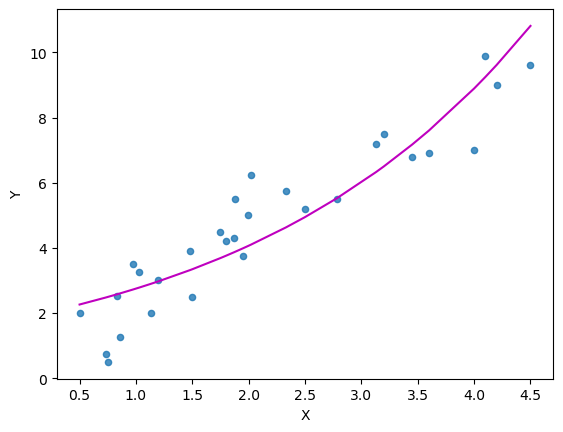

In [13]:
import matplotlib.pyplot as plt

# Plot out the model fit to the data
y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y, s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")

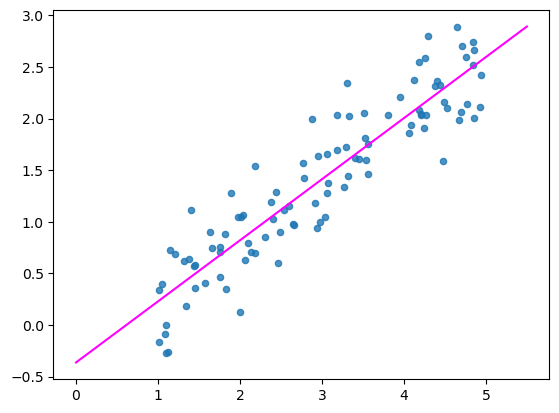

In [17]:
import numpy as np
from numpy.random import uniform, normal, poisson, binomial
from scipy import stats
# generate random data example
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4
sd = 0.3

x = uniform(1, 5, size=n_sample)
mu = a * x + b
y = normal(mu, sd)

# linear regression
slope, intercept, r_value, p_value, std_err  = stats.linregress(x, y)
xvals = np.array([0, 5.5])
yvals = slope * xvals + intercept

plt.scatter(x, y, s=20, alpha=0.8)
plt.plot(xvals, yvals, color='magenta')